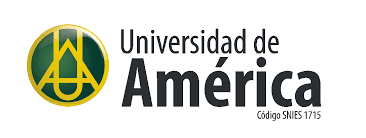

# 💶**Proyecto de Base de Datos**

Óscar Aponte


Código: 7211103

# 🤑**Predicción de Abandono de Clientes de una Compañia de Telecomunicaciones.**
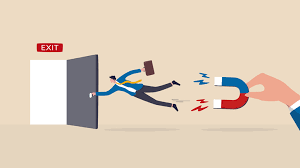

🌍 El mundo de las telecomunicaciones se ha vuelto crucial tanto en países avanzados como en aquellos que están en proceso de desarrollo. Con el constante avance tecnológico y la creciente cantidad de empresas en el mercado mundial, la competencia se ha vuelto más intensa que nunca. Las compañías están trabajando arduamente, implementando diferentes estrategias para poder mantenerse a flote en este entorno tan competitivo.

📈El churn (o la deserción de clientes) es una tendencia de los clientes a abandonar una
marca y dejar de ser un cliente que paga en un negocio en particular. El porcentaje de
clientes que dejan de usar los productos o servicios de una empresa durante un período
de tiempo particular se denomina tasa de abandono (abandono) de clientes.
Una de las formas de calcular una tasa de abandono es dividir el número de clientes
perdidos durante un intervalo de tiempo determinado por el número de clientes adquiridos, y luego multiplicar ese número por el 100 por ciento. Por ejemplo, si obtuvo 150
clientes y perdío tres el mes pasado, su tasa de rotación mensual es del 2 por ciento.


🚀
La experiencia del cliente, también conocida como Customer Experience (CX), se ha convertido en un elemento clave en la estrategia de cualquier negocio. Una excelente experiencia del cliente puede marcar la diferencia entre mantener a un cliente leal, o perderlo frente a la competencia.

🔑 De hecho, según diversos estudios, cuesta entre 5 y 25 veces más conseguir un nuevo cliente que retener uno existente. (Fuente: Harvard Business Review)

Estadísticas reveladoras muestran cómo la experiencia del cliente impacta los resultados financieros de una empresa:

📈 Un aumento del 5% en la retención de clientes puede aumentar las ganancias en un 25% a 95%. (Fuente: Harvard Business Review)

💰 El 86% de los clientes estarían dispuestos a pagar más por una mejor experiencia del cliente. (Fuente: SuperOffice)

🛍️ El 73% de los clientes citan la experiencia del cliente como un factor importante en su decisión de compra. (Fuente: PwC)

📣 El 77% de los clientes recomendaría una empresa a otros después de tener una experiencia positiva. (Fuente: Temkin Group)

# 🧑‍💻Compresión de Datos

Antes de profundizar en el análisis de datos, es crucial comprender bien las características de los datos que estamos estudiando. Esto nos ayuda a tener una visión más clara antes de adentrarnos en explicar los hallazgos. Durante esta fase inicial, llevamos a cabo lo que llamamos Comprensión de los Datos. Algunos pasos de preparación son bastante simples, como asegurarse de que los datos tengan un formato adecuado y eliminar duplicados. Otros pasos, más complejos, los abordaremos más adelante durante el Análisis Explicativo de Datos.

In [137]:
# Importamos la librerias requeridas hasta el momento
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Craraterización de la Data

1.  La base de datos se trae es un archivo CSV.✔️
2.  Se obtienen de la plataforma Kaggle, derivados de Escuela de Tecnología Digital Purwadhika de Indonesia, en cual se analiza una compañia Telefonica✔️
3. La base de datos es de Infomación Estructurada ✔️
4. Contiene una combinación de variables cuantitativas y cualitativas que se utilizan para analizar el comportamiento de los clientes ✔️



In [138]:
# Cargo y leo la base de datos
data = pd.read_csv('/content/drive/MyDrive/Bases de Datos /Proyecto_Base_De_Datos/data_telco_customer_churn.csv')
data.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 💈 Las 5 V del Big Data
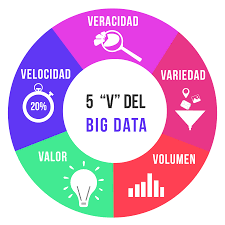
1. Volumen: Nos enfrentamos a grandes volúmenes datos.       ✔️
2. Velocidad: Velocidad, la de generación y la actualización de los datos     ✔️
3. Variedad: Los datos son diversos      ✔️
4. Veracidad: La veracidad de la fuente impacta el grado de fiabilidad     ✔️
5. Valor:  El valor que generan los datos es relevante        ✔️


#💽 Ciclo de Vida de los datos Generación


1.   Gobernanza de Datos es pública
2.   Metadatos y Catalogación es clara



💾Este conjunto de datos nos brinda información sobre los clientes de una empresa de telecomunicaciones y si han decidido dejar de utilizar sus servicios o no. Para las compañías de telecomunicaciones, perder clientes es muy importante, ya que retener a los clientes existentes suele ser más beneficioso que conseguir nuevos. Con estos datos, podemos analizar qué factores influyen en la decisión de los clientes de abandonar el servicio y también podemos crear modelos que nos ayuden a predecir cuáles clientes podrían estar en riesgo de irse.


| Atributo          | Descripción                                                                                   |
|-------------------|-----------------------------------------------------------------------------------------------|
| Dependents        | ¿El cliente tiene dependientes o no?                                                          |
| Tenure            | ¿Cuánto tiempo ha estado suscrito el cliente a los servicios de la empresa?                   |
| OnlineSecurity    | ¿El cliente utiliza el servicio de seguridad en línea o no?                                    |
| OnlineBackup      | ¿El cliente utiliza el servicio de copia de seguridad en línea o no?                           |
| InternetService   | ¿El cliente se suscribe al servicio de Internet o no?                                          |
| DeviceProtection  | ¿El cliente utiliza el servicio de protección de dispositivos o no?                            |
| TechSupport       | ¿El cliente utiliza servicios de soporte técnico o no?                                         |
| Contract          | Duración del contrato utilizado                                                                |
| PaperlessBilling  | ¿Se envía la factura de forma electrónica o no?                                                |
| MonthlyCharges    | Número de facturas cargadas cada mes                                                           |
| Churn             | ¿El cliente se ha dado de baja o no?                                                           |


In [140]:
# Describimos la Data
data.shape
print('El dataframe consta de 4930 filas y 11 columnas donde cada fila es una unidad de información de un cliente acompañada de 11 informaciones de atributos de todas las columnas.')
print(data.shape)

El dataframe consta de 4930 filas y 11 columnas donde cada fila es una unidad de información de un cliente acompañada de 11 informaciones de atributos de todas las columnas.
(4930, 11)


In [141]:
# Descripción de la data resumida
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [142]:
# Las cabezas de las columnas
data.columns.values

array(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'], dtype=object)

In [143]:
# Tipo de daos que se tiene
data.dtypes
print(data.dtypes)
print('Se tiene un dato float64 o sea un decimal' )
print('Se tiene un dato int64 o sea un entero ')
print('Se tiene nueve datso object o sea objetos texto ')

Dependents           object
tenure                int64
OnlineSecurity       object
OnlineBackup         object
InternetService      object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
Churn                object
dtype: object
Se tiene un dato float64 o sea un decimal
Se tiene un dato int64 o sea un entero 
Se tiene nueve datso object o sea objetos texto 


# 📖Metodologías y tipos de análisis de datos actuales
1. Análisis Descriptivo
2. Análisis Exploratorio
3. Análisis de sentimiento
4. Análisis Predictivo
5. Análisis Prescriptivo


# 1.📊Análisis Descriptivo

Se tiene nueve variables categoricas cualitativas y dos variables cauntitativas, las cuales nos da información sobre la empresa y como manejar los datos para el obetivo primario.


In [144]:
# Se usa lalibreria stast para describir las variables
summary_stats = data.describe(include='all')
print(summary_stats)

       Dependents       tenure OnlineSecurity OnlineBackup InternetService  \
count        4930  4930.000000           4930         4930            4930   
unique          2          NaN              3            3               3   
top            No          NaN             No           No     Fiber optic   
freq         3446          NaN           2445         2172            2172   
mean          NaN    32.401217            NaN          NaN             NaN   
std           NaN    24.501193            NaN          NaN             NaN   
min           NaN     0.000000            NaN          NaN             NaN   
25%           NaN     9.000000            NaN          NaN             NaN   
50%           NaN    29.000000            NaN          NaN             NaN   
75%           NaN    55.000000            NaN          NaN             NaN   
max           NaN    72.000000            NaN          NaN             NaN   

       DeviceProtection TechSupport        Contract PaperlessBi

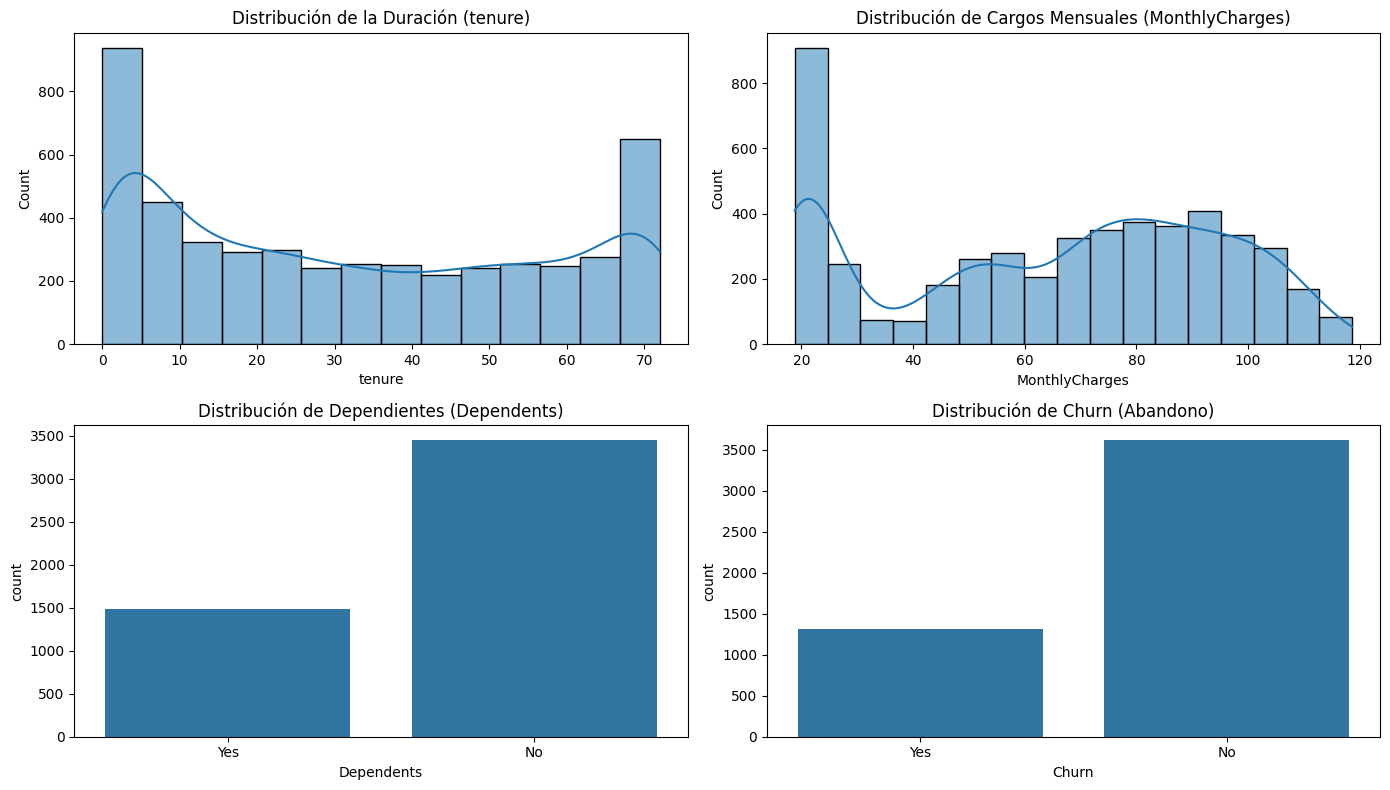

In [145]:
# Gráficos de distribución para algunas variables
plt.figure(figsize=(14, 8))
# Distribución de la duración (tenure)
plt.subplot(2, 2, 1)
sns.histplot(data['tenure'], kde=True)
plt.title('Distribución de la Duración (tenure)')
# Distribución de los cargos mensuales (MonthlyCharges)
plt.subplot(2, 2, 2)
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Distribución de Cargos Mensuales (MonthlyCharges)')
# Distribución de la dependencia (Dependents)
plt.subplot(2, 2, 3)
sns.countplot(x='Dependents', data=data)
plt.title('Distribución de Dependientes (Dependents)')
# Distribución del Churn (abandono)
plt.subplot(2, 2, 4)
sns.countplot(x='Churn', data=data)
plt.title('Distribución de Churn (Abandono)')
plt.tight_layout()
plt.show()

In [146]:
# Describir los datos numericos descriptivos
data.describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


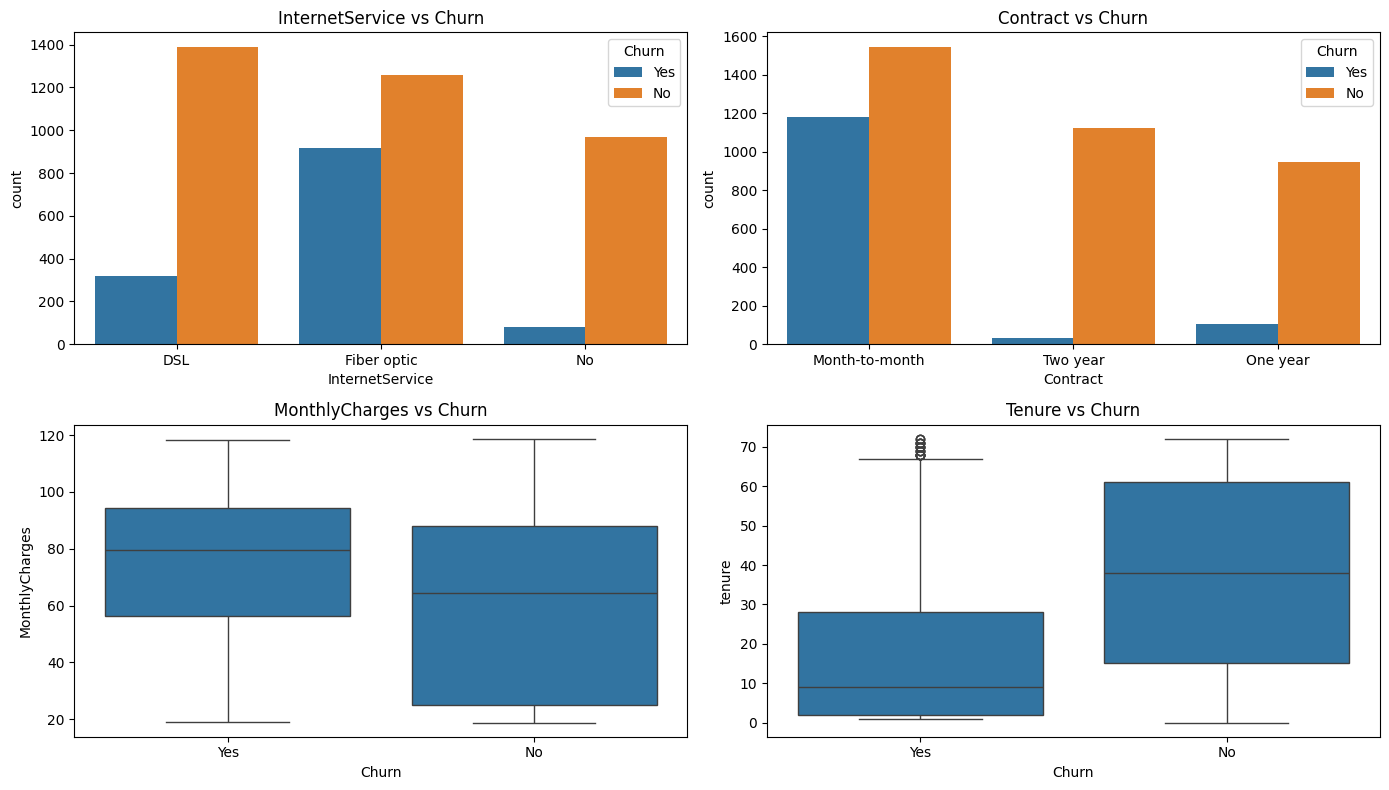

In [147]:
# Gráficos de relaciones
plt.figure(figsize=(14, 8))
# Relación entre InternetService y Churn
plt.subplot(2, 2, 1)
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('InternetService vs Churn')
# Relación entre Contract y Churn
plt.subplot(2, 2, 2)
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Contract vs Churn')
# Relación entre MonthlyCharges y Churn
plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('MonthlyCharges vs Churn')
# Relación entre tenure y Churn
plt.subplot(2, 2, 4)
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs Churn')
plt.tight_layout()
plt.show()

In [148]:
# Se quitan los datos duplicados se sabe que no hay datos vacios para limpiar la data
print('El total de registros duplicados es {}.'.format(data.duplicated().sum()))
data[data.duplicated()].head()

El total de registros duplicados es 77.


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
624,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
701,No,41,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.65,No
786,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.65,Yes
951,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.15,Yes
1266,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No


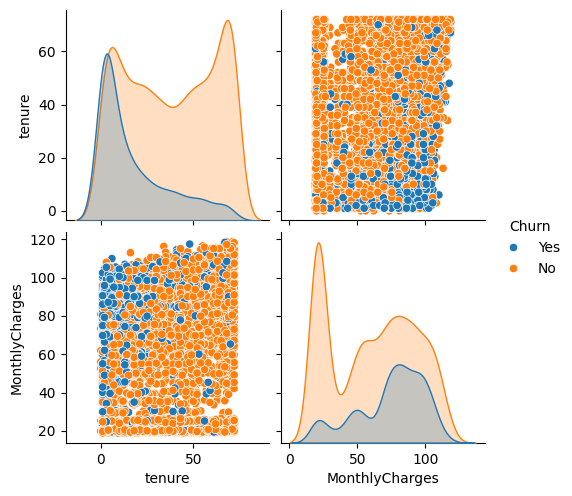

In [149]:
# Comportamiento de las personas que si o no salen de la compañia
sns.pairplot(data, hue='Churn')

In [150]:
# Hacemos de nuevo los códigos anteriores, pero ya sin los datos repetidos. Se determina las caracteristicas y variables descriptivas
for i, tipos_caracteristicas in enumerate([['int', 'float'], ['object']]):
    tipo_caracteristica = 'Numéricas' if i == 0 else 'Categóricas'
    print('Estadísticas Descriptivas y Características {}'.format(tipo_caracteristica))
    display(data.describe(include=tipos_caracteristicas))


Estadísticas Descriptivas y Características Numéricas


,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


Estadísticas Descriptivas y Características Categóricas


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


Se optimizan los datos se puede optimizar aún más cambiando su tipo de datos al tipo de datos apropiado para que la capacidad de memoria utilizada sea más eficiente

In [151]:

# Almacene los tipos de datos de cada columna antes de la conversión de tipos
before = data.dtypes
# Recorrer cada columna y convertir los tipos de datos
for col in data.columns:
    if data[col].dtype == 'float64':
        data[col] = data[col].astype('float32')
    elif data[col].dtype == 'int64':
        n_bits = data[col].max().itemsize * 8
        args = 'int8' if n_bits <= 8 else 'int16' if n_bits <= 16 else 'int32' if n_bits <= 32 else 'int64'
        data[col] = data[col].astype(args)
    else:
        args = 'category' if data[col].nunique() <= 10 else 'object'
        data[col] = data[col].astype(args)
summary = pd.DataFrame({
    'Features': data.columns,
    'Before': before.values,
    'After': data.dtypes.values
})

data.info(verbose=False, memory_usage=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Columns: 11 entries, Dependents to Churn
dtypes: category(9), float32(1), int64(1)
memory usage: 102.4 KB


# 2. ⏬Análisis Exploratorio

La identificación de patrones, tendencias, relaciones, anomalías en los datos, así como su relevancia

<ipython-input-152-9d8ac26b582d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




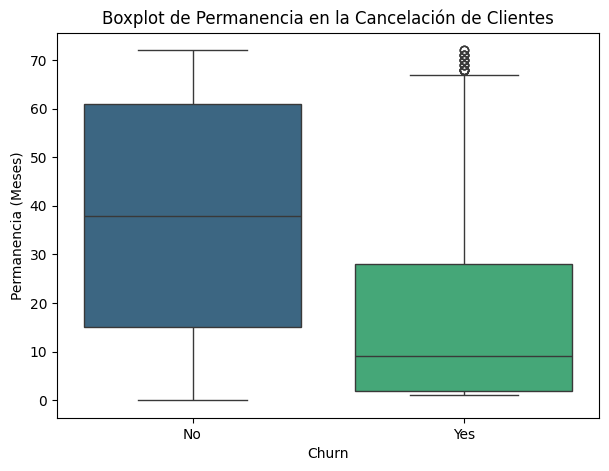

In [152]:
#El Box Plot compara la permanencia en meses de los clientes que han cancelado el servicio (Churn = Yes) con aquellos que no lo han cancelado (Churn = No)
# Crear un boxplot para 'tenure' vs. 'Churn'
_=plt.figure(figsize=(7, 5))
sns.boxplot(
    data=data,
    y='tenure',
    x='Churn',
    palette='viridis'
)
plt.ylabel('Permanencia (Meses)')
plt.title('Boxplot de Permanencia en la Cancelación de Clientes')
_=plt.show()


Existe una anomalía en forma de valores atípicos superiores específicos para los clientes que abandonan. Entonces, es necesario realizar un análisis más profundo

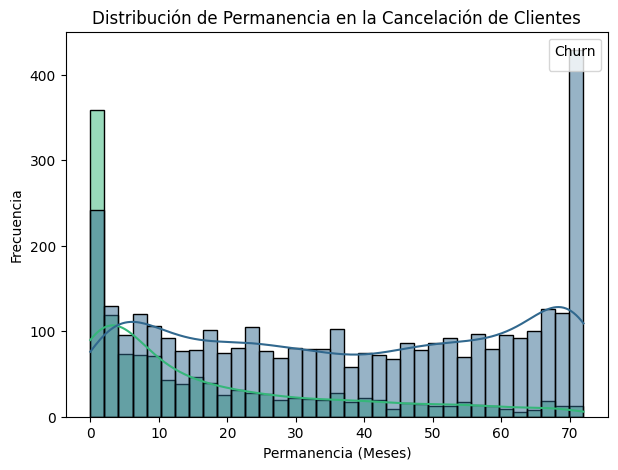

In [153]:
# Histograma al cual se le aplica la densidad de kernerl gaussiano, para visualizar la distribución de la permanencia ('tenure') de los clientes
#diferenciando entre aquellos que han cancelado el servicio ('Churn = Yes') y los que no ('Churn = No')
plt.figure(figsize=(7, 5))
sns.histplot(
    data=data,
    x='tenure',
    hue='Churn',
    bins=35,
    palette='viridis',
    kde=True
)
plt.xlabel('Permanencia (Meses)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Permanencia en la Cancelación de Clientes')
plt.legend(title='Churn', loc='upper right')
plt.show()


De acuerdo con la visualización anterior, podemos observar que la mayoría de los clientes que cancelan su suscripción tienen una duración de suscripción más corta en comparación con aquellos que continúan suscritos

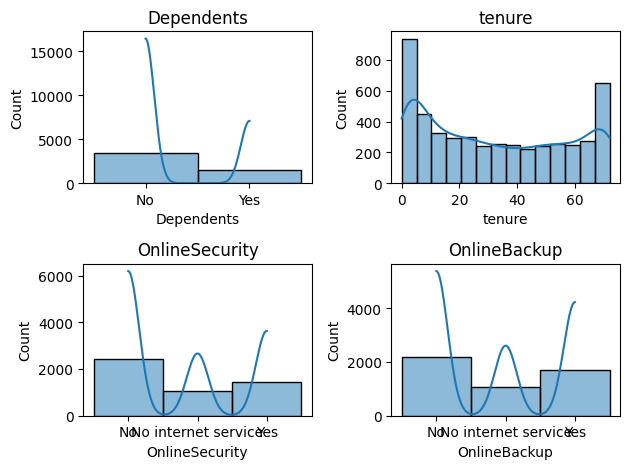

In [154]:
columns_to_plot = data.drop('Churn', axis=1).columns[:4]  # Tomar solo las primeras 4 columnas
for k, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, k)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


<Figure size 400x400 with 0 Axes>

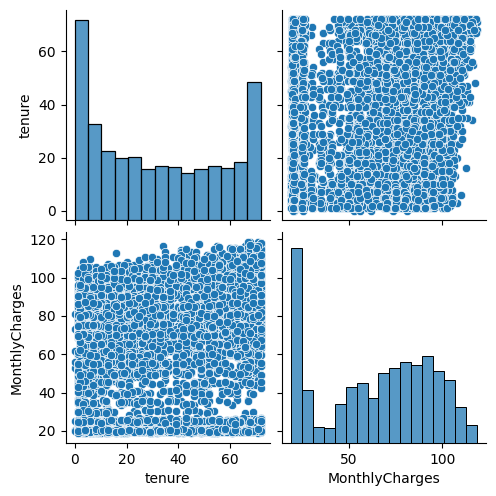

In [155]:
# Grafico Distribuciones + Dispersión
plt.figure(figsize=(4,4))
_ = sns.pairplot(data)
plt.show()

se oberva que hay valores atipicos, se obervara si son sitematicos o no mediante los outliers, más adelante realizaremos esta parte

## 🚀Correlación y Covarianza inicial de características

La correlación de variables es una medida estadística que describe la relación entre dos variables. Indica cómo se mueven juntas o en dirección opuesta. La correlación puede ser positiva, negativa o nula.

$$\rho_{XY} = \frac{{\sum_{i=1}^{n}(X_i - X)(Y_i - Y)}}{{\sqrt{{\sum_{i=1}^{n}(X_i - X)^2}\sum_{i=1}^{n}(Y_i - Y)^2}}}$$






$$\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$


In [156]:
# Calculo Matriz de Correlaciones de variaables numericas
data.corr(numeric_only=True)

,tenure,MonthlyCharges
tenure,1.000000,0.240244
MonthlyCharges,0.240244,1.000000


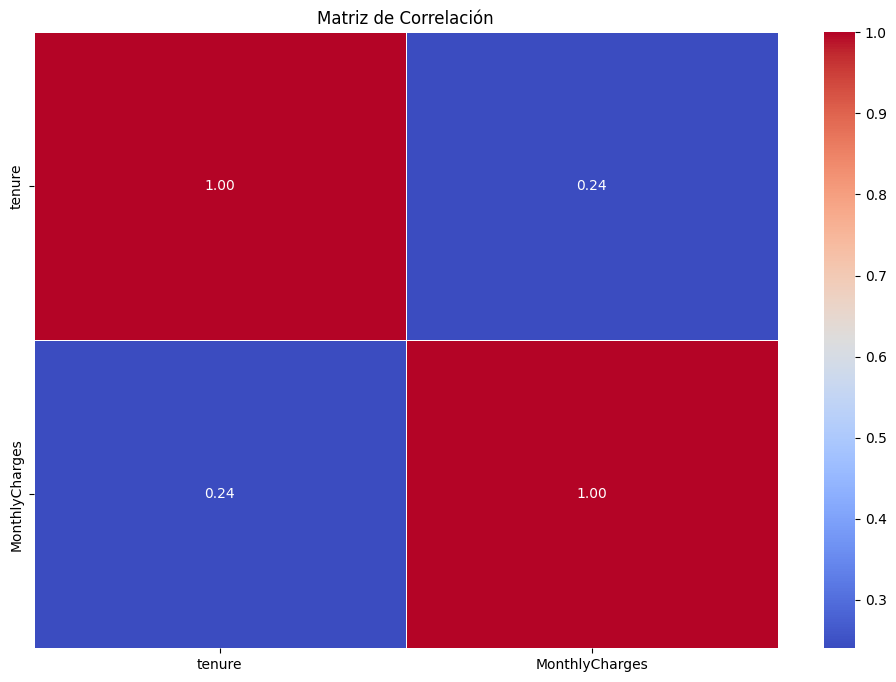

Variables con la correlación más alta:
tenure          MonthlyCharges    0.240244
MonthlyCharges  tenure            0.240244
dtype: float64


In [157]:
# Selecciona solo las columnas numéricas
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()
# Encuentra las variables con la correlación más alta
high_correlation_vars = correlation_matrix.unstack().sort_values(ascending=False)
print("Variables con la correlación más alta:")
print(high_correlation_vars[high_correlation_vars != 1].head(10))




1.   Tenure (Antigüedad) y MonthlyCharges (Cargos Mensuales), tienen una correlación positiva aproximadamente 0.24, significa que los clientes que han estado suscritos por más tiempo tienden a pagar cargos mensuales ligeramente más altos.
2.   MonthlyCharges (Cargos Mensuales) y Churn_numeric (Churn) tienen una correlación positiva de 0.19, significa que los clientes que pagan cuotas mensuales más altos tienen una tendencia ligeramente mayor a abandonar la compañia (Churn).
3. Tenure (Antigüedad) y Churn_numeric (Churn) tienen una correlación negativa significativa de -0.36, esto sugiere que los clientes que han estado suscritos por más tiempo tienden a tener una probabilidad menor de abandonar la compañia
Los clientes tienden a cancelar el servicio después de períodos más cortos de tiempo.


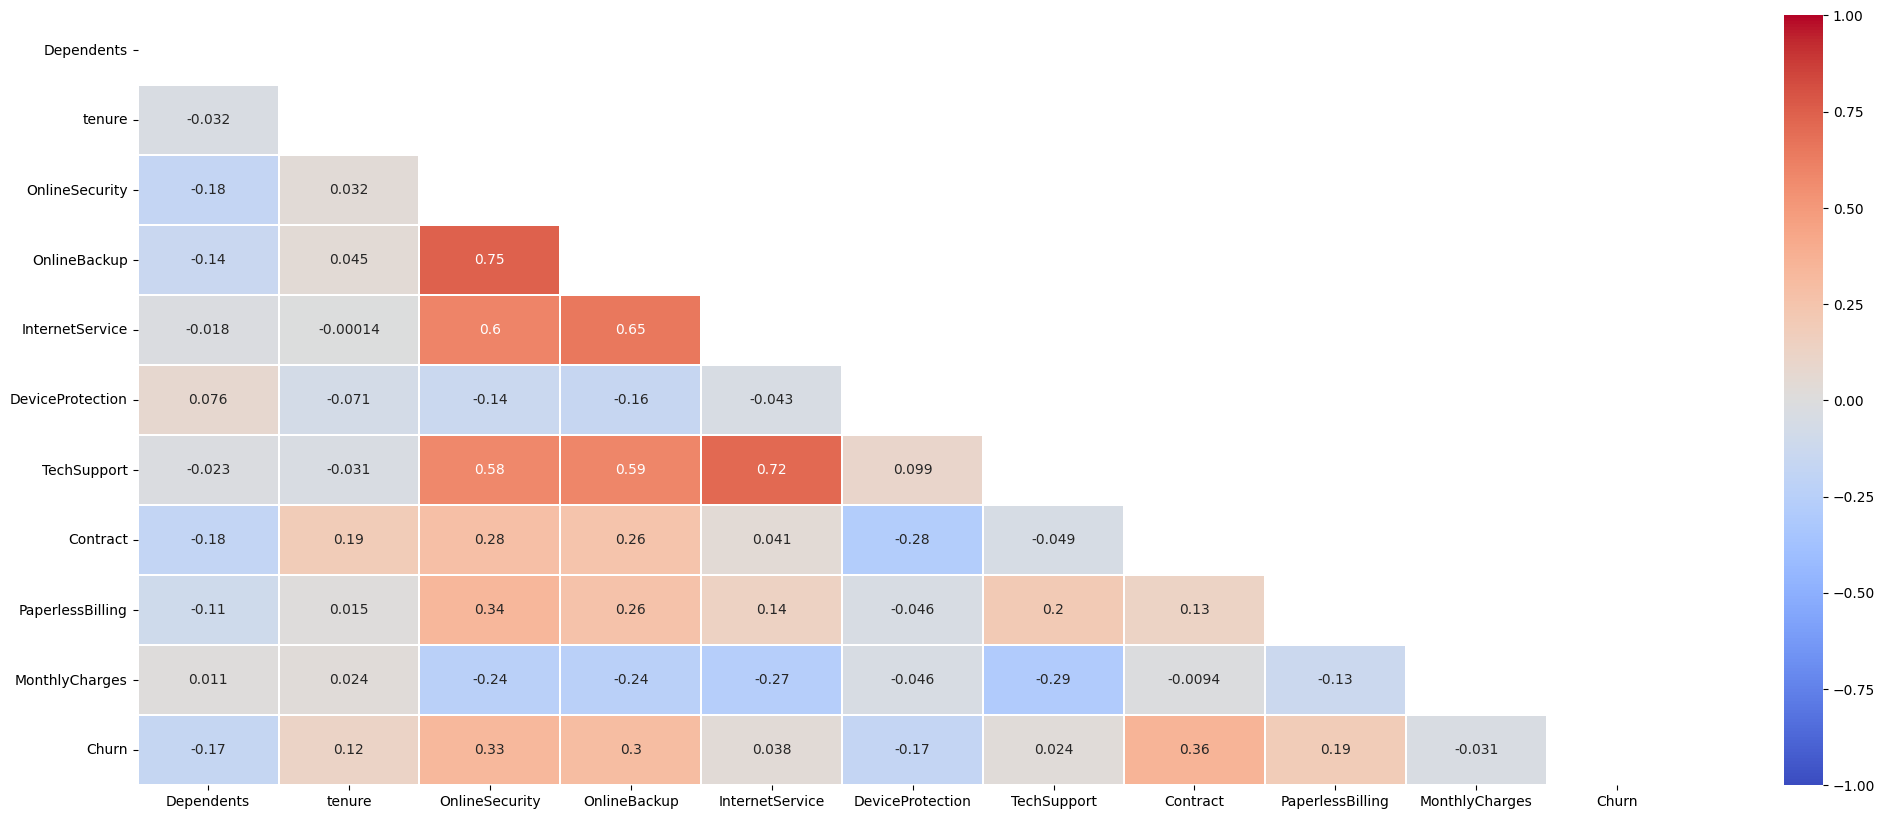

In [158]:
# Mapa de carlor, para verificar la correlación
plt.figure(5, figsize=(25, 10))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

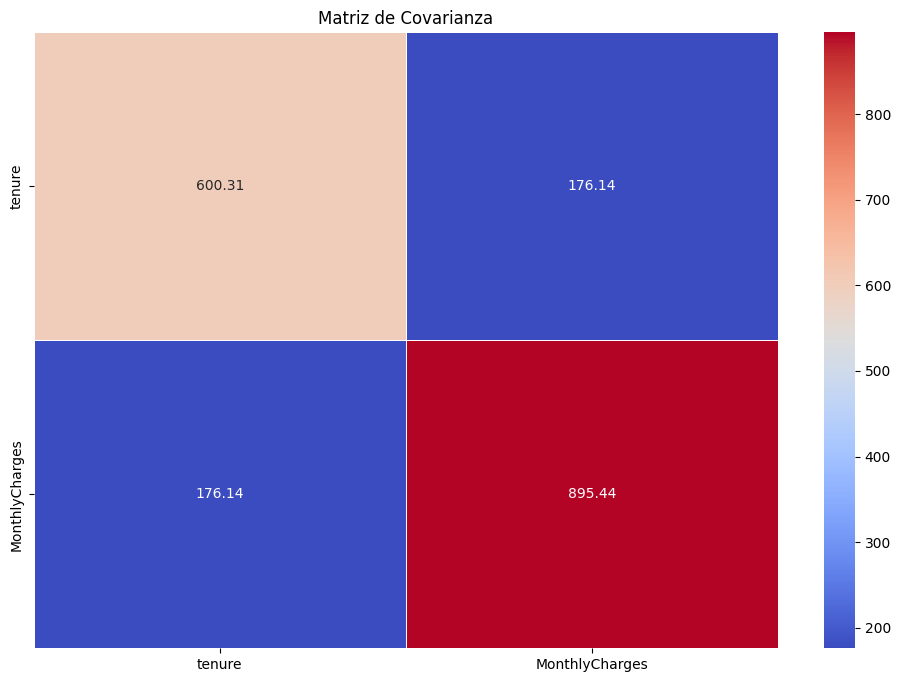

Variables con la covarianza más alta:
MonthlyCharges  MonthlyCharges    895.443364
tenure          tenure            600.308459
                MonthlyCharges    176.140325
MonthlyCharges  tenure            176.140325
dtype: float64


In [159]:
# matriz de covarianza
numeric_data = data.select_dtypes(include=['number'])
covariance_matrix = numeric_data.cov()
plt.figure(figsize=(12, 8))
sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Covarianza")
plt.show()
high_covariance_vars = covariance_matrix.unstack().sort_values(ascending=False)
print("Variables con la covarianza más alta:")
print(high_covariance_vars[high_covariance_vars != 1].head(10))




1.   MonthlyCharges y tenure es positiva (176.14), lo que sugiere que a medida que la cantidad de tiempo que un cliente ha estado suscrito aumenta, es probable que también aumenten sus cargos mensuales.
2.   tenure y Churn es negativa (-3.93), lo que indica que a medida que el tiempo de suscripción (tenure) aumenta, es menos probable que el cliente se dé de baja (Churn).
3. Churn y MonthlyCharges es bastante baja (2.56), lo que sugiere que no hay una relación lineal fuerte entre la tasa de abandono y los cargos mensuales.



# 3.🔥 Análisis de sentimientos

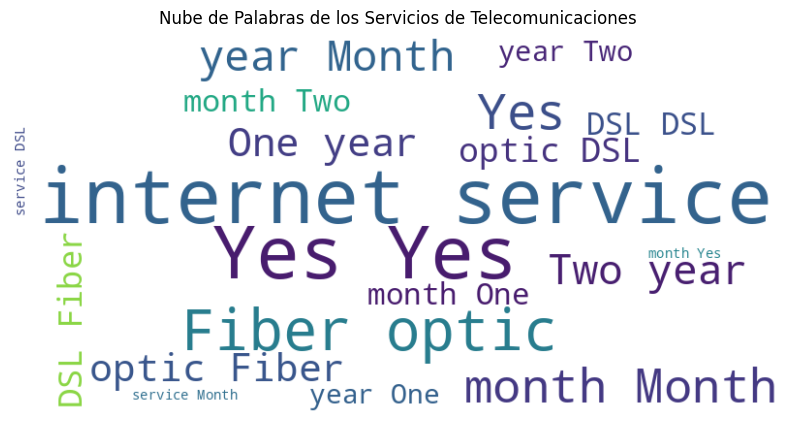

In [160]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

# Combinar el texto de las columnas relevantes en un solo corpus de texto
text_corpus = ' '.join(data['OnlineSecurity']) + ' ' + \
              ' '.join(data['OnlineBackup']) + ' ' + \
              ' '.join(data['InternetService']) + ' ' + \
              ' '.join(data['DeviceProtection']) + ' ' + \
              ' '.join(data['TechSupport']) + ' ' + \
              ' '.join(data['Contract']) + ' ' + \
              ' '.join(data['PaperlessBilling'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Servicios de Telecomunicaciones')
plt.show()


In [161]:
sentiment_scores = TextBlob(text_corpus).sentiment
print("Puntaje de Sentimiento:", sentiment_scores)
print('puntaje de polaridad y subjetividad de 0.0 indica que el texto es completamente neutral y objetivo, sin expresar ningún sentimiento o opinión subjetiva.')

Puntaje de Sentimiento: Sentiment(polarity=0.0, subjectivity=0.0)
puntaje de polaridad y subjetividad de 0.0 indica que el texto es completamente neutral y objetivo, sin expresar ningún sentimiento o opinión subjetiva.


# 🔮4.Análisis Predictivo

El análisis predictivo es una rama de análisis avanzados que hace predicciones sobre resultados futuros utilizando datos históricos combinados con modelado estadístico, técnicas de extracción de datos y aprendizaje automático.
Se intentara emplear el análisis predictivos para hallar patrones en estos datos e identificar riesgos y oportunidades.


**Se identica los outliers**

Outliers y cuartiles, se obervara si son sitematicos o no mediante  valores atipicos colectivos adelante.

Se importa el paquete **re** que da acceso a una herramienta que  permite buscar, reemplazar y validar texto de manera eficiente y precisa.Encuentra patrones de texto.

Definir una clase para gestionar el análisis de valores atípicos colectivos

La relación que se va a analizar son los valores atípicos y no atípicos de los clientes que abandonan mediante la distribución de las varibales que indican mayor permanencia. Identificar y analizar los outliers es nuestro objetivo por categorias

In [162]:
import re
# Se busca los outliares dependiendo de la distribución del tiempo en que permanece los clientes en la compañia
class collective_outliers:
    def __init__(self,churn:str,num_var:str,on:list=None,upper_outliers:bool=False,lower_outliers:bool=False):
        if on is None:
            desc = data[data['Churn']==churn][num_var].describe()
        else:
            self.on_var = (data[on[0]]==on[1])
            desc = data[
                (data['Churn']==churn) &
                self.on_var
            ][num_var].describe()

        self.num_var, self.churn, self.on, q1, q3 = num_var, churn, on, desc['25%'], desc['75%']
        self.upper_value, self.lower_value = q3+(1.5*(q3-q1)), q1-(1.5*(q3-q1))
        self.upper_outliers, self.lower_outliers = upper_outliers, lower_outliers

        if upper_outliers & lower_outliers:
            self.slicing = (data[num_var]<self.lower_value) | (data[num_var]>self.upper_value)
        elif upper_outliers:
            self.slicing = (data[num_var]>self.upper_value)
        else:
            self.slicing = (data[num_var]<self.lower_value)

    def get_table(self):
        if self.on is None:
            stats = pd.concat(
                [
                    data[
                        (data['Churn']==self.churn) &
                        i
                    ].describe(include='category').transpose() for i in [
                        self.slicing,
                        ~self.slicing
                    ]
                ],
                axis=1,
                keys=[
                    'Outliers',
                    'Non-Outliers'
                ]
            )
        else:
            stats = pd.concat(
                [
                    data[
                        (data['Churn']==self.churn) &
                        self.on_var &
                        i
                    ].describe(include='category').transpose() for i in [
                        self.slicing,
                        ~self.slicing
                    ]
                ],
                axis=1,
                keys=[
                     'Outliers',
                     'Non-Outliers'
                ]
            )
        stats[('Outliers','freq (%)')] = stats[[
            ('Outliers','count'),
            ('Outliers','freq')
        ]].apply(
            func=lambda x: round(
                number=(x[1]/x[0])*100,
                ndigits=2
            ),
            axis=1
        )
        self.diff = stats[stats[('Outliers','top')]!=stats[('Non-Outliers','top')]]
        return self.diff
    def box_plot(self):
        if self.get_table()[('Outliers','top')][0] == 'No hay sevicio de internet':
            params = self.get_table()[self.get_table()[('Outliers','freq (%)')]!=100]
        else:
            params = self.get_table()
        fig, ax = plt.subplots(
            ncols=len(params)+1,
            figsize=((len(params)*5)+1.5,5),
            sharey=True,
            gridspec_kw={
                'wspace':.05,
                'width_ratios':[5]*len(params)+[1.5]
            }
        )
        for i,col in enumerate(params.index.values):
            base = data if self.on is None else data[data[self.on[0]]==self.on[1]]
            box = sns.boxplot(
                data=base,
                x=col,
                y=self.num_var,
                hue='Churn',
                ax=ax[i],
                palette='viridis'
            )
            var = re.sub(
                pattern=r'(?<=\w)([A-Z])',
                repl=r' \1',
                string=self.num_var
            ).title()
            box.set_ylabel(
                var if i == 0 else
                ''
            )
            box.set_xlabel(
                re.sub(
                    pattern=r'(?<=\w)([A-Z])',
                    repl=r' \1',
                    string=col
                ).title()
            )

            line = self.lower_value if self.lower_outliers else self.upper_value
            box.axhline(
                y=line,
                color='red',
                linewidth=.5
            )
        sns.boxplot(
            data=base,
            x='Churn',
            y=self.num_var,
            palette='viridis'
        ).set_ylabel('')
        fig.suptitle(f'{var}  distribuyen los datos en las características específicas ')

El código genera una tabla que resume las estadísticas descriptivas de los outliers y los no outliers con la distribución de los parámetros de bandono principales. Los valores atípicos y no atípicos en la variable 'tenure', agrupados por si los clientes abandonaron la empresa o no.
La frecuencia de los outliers como porcentaje del total en cada categoría.

In [163]:
# Crea la clase de collective_outliers
diff = collective_outliers(
    churn='Yes',       #
    num_var='tenure',  # variable numerica
    upper_outliers=True  # outliers superiores
)
# tabla de los outliers
diff.get_table()

Outliers                       Non-Outliers         \
                    count unique       top freq        count unique   
OnlineBackup           25      2       Yes   21         1291      3   
DeviceProtection       25      2       Yes   17         1291      3   
Contract               25      3  One year   10         1291      3   

                                       Outliers  
                             top  freq freq (%)  
OnlineBackup                  No   881     84.0  
DeviceProtection              No   843     68.0  
Contract          Month-to-month  1172     40.0

**Copia de seguridad en línea y Protección de dispositivos**
OnlineBackup y DeviceProtection

Hay 25 clientes considerados como outliers en la característica de OnlineBackup y DeviceProtection. Eto singnifica que el comportamiento de esas dos varibles es diferente al resto.


En el grupo de outliers, la mayoría tiene activado el servicio de OnlineBackup y DeviceProtection. Sin embargo, en el grupo de no outliers, la mayoría no tiene activados estos servicios 'No', con una frecuencia de 881 para OnlineBackup y 843 para DeviceProtection.

Contrato:

Hay 25 clientes considerados como outliers en la característica de contrato. Estos clientes tienen un tipo de contrato que es poco común en comparación con la mayoría.

En el grupo de outliers, la mayoría tiene un contrato de un año , con una frecuencia de 10.
Mientras que en el grupo de no outliers, la mayoría tiene contratos de corto plazo, con una frecuencia de 1172.

En el caso de OnlineBackup y DeviceProtection, la presencia o ausencia de estos servicios parece estar relacionada con la decisión de abandonar la empresa. Del mismo modo, el tipo de contrato también parece influir en la decisión de los clientes de quedarse o irse.

<ipython-input-162-585ad9998bbd>:120: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




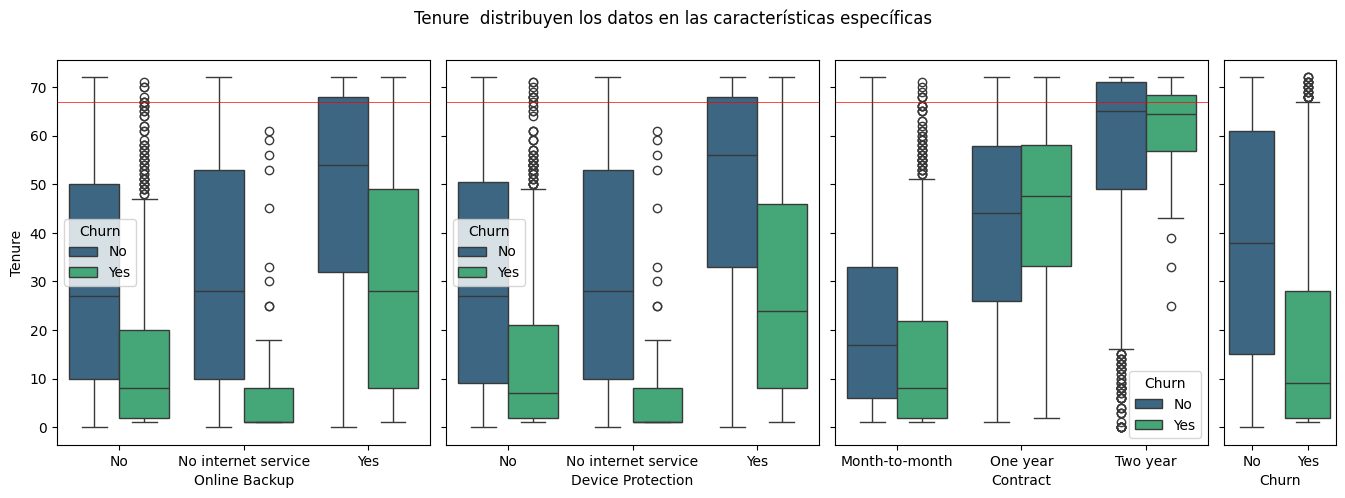

In [164]:
diff.box_plot()

Se eliminara los datos que estan por encima del margen  superior de los valores atipicos para evitar sesgos en el procedimiento.

Entonces se eliminara los datos que generan sesgo aunque en la relaciones de las varibles.

In [165]:
print(diff.upper_value)
max_value = data['tenure'].max()
print(max_value)

67.0
72


Los valores que se encuentren superiores a 67 seran eliminados sabiendo que el valor atipico más alto es de 72

In [166]:
# Datos que cumplen con los requisitos del estudio
idx = data[
    (data['Churn'] == 'Yes') &
    (data['tenure'] > diff.upper_value) &
    (
        (data['OnlineBackup'] == 'No') |
        (data['DeviceProtection'] == 'No') |
        (data['Contract'] == 'Month-to-month')
    )
].index.values
# removemos los datos superiores a 67
data = data.drop(index=idx)

Se analiza los valores atípicos en el tiempo de permanencia de los clientes que han abandonado la compañía mediante la comparación de los cuqriles , comparando estos datos con los de los clientes no outliers.

In [167]:
def get_info():
    if i == 0:
        display(thres)
    else:
        stats = data[
            (data['Churn'] == 'Yes') &
            (thres)
        ].describe(include='category').transpose()

        stats['freq (%)'] = stats[[
            'count',
            'freq'
        ]].apply(
            func=lambda x: round(
                number=(x[1] / x[0]) * 100,
                ndigits=2
            ),
            axis=1
        )
        display(stats)
desc = data[data['Churn'] == 'Yes'][['tenure']].describe()
q1, q3 = desc.loc['25%'].values[0], desc.loc['75%'].values[0]
slicing = data['tenure'] <= q3
upper_outliers = data['tenure'] > (q3 + (1.5 * (q3 - q1)))
for i, thres in enumerate([desc.transpose(), slicing, -slicing, upper_outliers]):
    print(
        '\Estadísticas descriptivas de la pérdida de clientes en función de la antigüedad',
        '{}.'.format(
            'con base on Tenure' if i == 0 else 'antiguedad tenure {} {} meses'.format(
                'Hasta' if i == 1 else 'más de',
                int(q3)
            ) if i < 3 else 'cuya permanencia está dentro de los valores atípicos'
        )

    )
    get_info()

\Estadísticas descriptivas de la pérdida de clientes en función de la antigüedad con base on Tenure.


,count,mean,std,min,25%,50%,75%,max
tenure,1304.0,17.199387,18.716247,1.0,2.0,9.0,27.0,72.0


\Estadísticas descriptivas de la pérdida de clientes en función de la antigüedad antiguedad tenure Hasta 27 meses.


,count,unique,top,freq,freq (%)
Dependents,984,2,No,830,84.35
OnlineSecurity,984,3,No,786,79.88
OnlineBackup,984,3,No,735,74.70
InternetService,984,3,Fiber optic,650,66.06
DeviceProtection,984,3,No,699,71.04
TechSupport,984,3,No,795,80.79
Contract,984,3,Month-to-month,963,97.87
PaperlessBilling,984,2,Yes,718,72.97
Churn,984,1,Yes,984,100.00


\Estadísticas descriptivas de la pérdida de clientes en función de la antigüedad antiguedad tenure más de 27 meses.


,count,unique,top,freq,freq (%)
Dependents,320,2,No,251,78.44
OnlineSecurity,320,3,No,228,71.25
OnlineBackup,320,3,Yes,167,52.19
InternetService,320,3,Fiber optic,257,80.31
DeviceProtection,320,3,Yes,169,52.81
TechSupport,320,3,No,215,67.19
Contract,320,3,Month-to-month,209,65.31
PaperlessBilling,320,2,Yes,263,82.19
Churn,320,1,Yes,320,100.00


\Estadísticas descriptivas de la pérdida de clientes en función de la antigüedad cuya permanencia está dentro de los valores atípicos.


,count,unique,top,freq,freq (%)
Dependents,36,2,No,24,66.67
OnlineSecurity,36,2,No,22,61.11
OnlineBackup,36,2,Yes,28,77.78
InternetService,36,2,Fiber optic,29,80.56
DeviceProtection,36,2,Yes,32,88.89
TechSupport,36,2,Yes,20,55.56
Contract,36,3,One year,16,44.44
PaperlessBilling,36,2,Yes,27,75.00
Churn,36,1,Yes,36,100.00


minimo: El valor mínimo de tenure es 1 mes.

25%: El primer cuartil es de 2 meses, lo que significa que el 25% de los clientes tienen una antigüedad menor o igual a 2 meses.

50%: La mediana 50% es de 9 meses.

75%: El tercer cuartil es de 27 meses, lo que significa que el 75% de los clientes tienen una antigüedad menor o igual a 27 meses.

maximo : El valor máximo de tenure es de 72 meses.

| **Variable**         | **Descripción**                                                                                 |
|----------------------|-------------------------------------------------------------------------------------------------|
| **Dependents**       | De los 984 clientes con tenure hasta 27 meses que han abandonado, el 84.35% (830) no tienen dependientes. |
| **OnlineSecurity**   | El 79.88% (786) no tienen seguridad en línea.                                                   |
| **OnlineBackup**     | El 74.70% (735) no tienen respaldo en línea.                                                    |
| **InternetService**  | El 66.06% (650) usan servicio de internet de fibra óptica.                                      |
| **DeviceProtection** | El 71.04% (699) no tienen protección de dispositivos.                                           |
| **TechSupport**      | El 80.79% (795) no tienen soporte técnico.                                                      |
| **Contract**         | El 97.87% (963) tienen contratos mensuales.                                                     |
| **PaperlessBilling** | El 72.97% (718) usan facturación sin papel.                                                     |
| **Churn**            | Todos los 984 clientes (100%) en este análisis han abandonado.                                  |


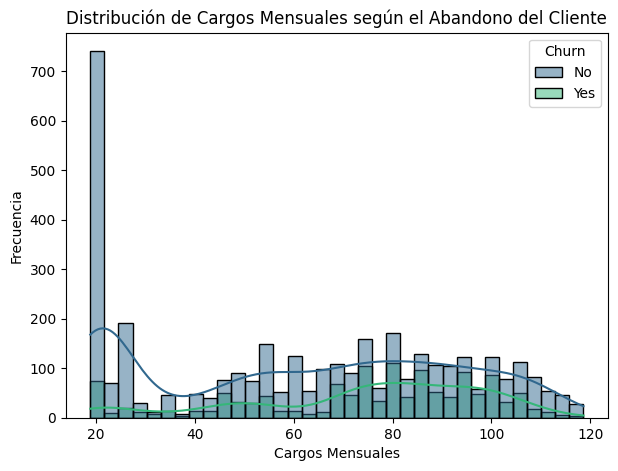

In [168]:
# Crear un histograma y gráfico KDE para 'MonthlyCharges' con 'Churn' como variable de color
plt.figure(figsize=(7, 5))
sns.histplot(
    data=data,
    x='MonthlyCharges',  # Cargos mensuales en el eje x
    hue='Churn',  # Abandono
    bins=35,
    palette='viridis',
    kde=True
)
# Añadir un título al histograma
plt.title('Distribución de Cargos Mensuales según el Abandono del Cliente')
# Establecer etiquetas de los ejes
plt.xlabel('Cargos Mensuales')
plt.ylabel('Frecuencia')
# Mostrar el histograma
plt.show()

<ipython-input-169-84123207c469>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




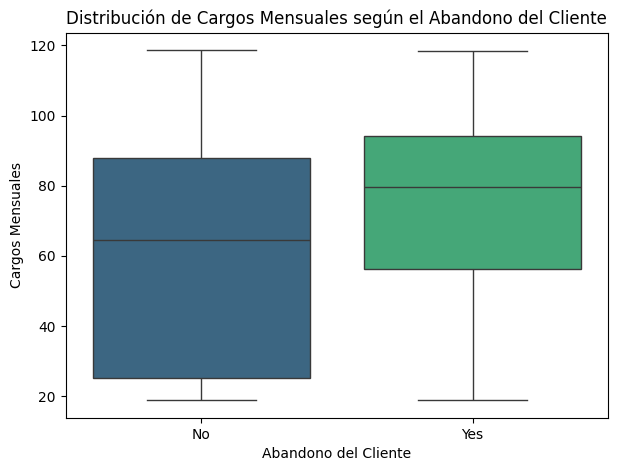

In [169]:
# Crear un boxplot para 'MonthlyCharges' vs. 'Churn'
plt.figure(figsize=(7, 5))
sns.boxplot(
    data=data,
    y='MonthlyCharges',  # Cargos mensuales
    x='Churn',  # Abandono
    palette='viridis'
)
# Añadir un título al boxplot
plt.title('Distribución de Cargos Mensuales según el Abandono del Cliente')
# Establecer etiquetas de los ejes
plt.xlabel('Abandono del Cliente')
plt.ylabel('Cargos Mensuales')
# Mostrar el boxplot
plt.show()

ya con los datos depurados y con la correción de de los outliares se procedera a intentar realizar la predcción de los clientes propensol a abandonar la compañia, ya que tenemos las variables mas correlacionadas, por tal motivo solo queda ajustar el modelo de machien laerning para la menciona prediccipin


In [170]:
# Se calculas de nuevo las estadísticas con la nueva información
desc = data[data['Churn'] == 'Yes'][['MonthlyCharges']].describe()
q1, q3 = desc.loc['25%'].values[0], desc.loc['75%'].values[0]
slicing = (data['MonthlyCharges'] >= q1) & (data['MonthlyCharges'] <= q3)
for i, thres in enumerate([desc.transpose(), slicing, -slicing]):
    print(
        '\Estadísticas descriptivas churn ',
        '{}.'.format(
            'con base Monthly Charges' if i == 0 else 'cuota mensual es {}{} {} {}{}'.format(
                'entre ' if i == 1 else 'menos de ',
                round(q1, 2),
                'and' if i == 1 else 'or',
                '' if i == 1 else 'más de ',
                round(q3, 2)
            )
        )
    )
    get_info()

\Estadísticas descriptivas churn  con base Monthly Charges.


,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,1304.0,74.344826,24.417257,18.85,56.25,79.650002,94.099998,118.349998


\Estadísticas descriptivas churn  cuota mensual es entre 56.25 and 94.1.


,count,unique,top,freq,freq (%)
Dependents,655,2,No,549,83.82
OnlineSecurity,655,2,No,572,87.33
OnlineBackup,655,2,No,512,78.17
InternetService,655,2,Fiber optic,583,89.01
DeviceProtection,655,2,No,522,79.69
TechSupport,655,2,No,568,86.72
Contract,655,3,Month-to-month,617,94.20
PaperlessBilling,655,2,Yes,511,78.02
Churn,655,1,Yes,655,100.00


\Estadísticas descriptivas churn  cuota mensual es menos de 56.25 or más de 94.1.


,count,unique,top,freq,freq (%)
Dependents,649,2,No,532,81.97
OnlineSecurity,649,3,No,442,68.10
OnlineBackup,649,3,No,369,56.86
InternetService,649,3,Fiber optic,324,49.92
DeviceProtection,649,3,No,321,49.46
TechSupport,649,3,No,442,68.10
Contract,649,3,Month-to-month,555,85.52
PaperlessBilling,649,2,Yes,470,72.42
Churn,649,1,Yes,649,100.00


| **Categoría**                                      | **Cargos Mensuales entre $56.25 y $94.10** | **Cargos Mensuales < $56.25 o > $94.10** |
|----------------------------------------------------|--------------------------------------------|------------------------------------------|
| **Dependientes**                                   | La mayoría no tiene dependientes           | La mayoría no tiene dependientes         |
| **Seguridad en Línea (OnlineSecurity)**            | La mayoría no tiene                        | Un menor porcentaje no tiene             |
| **Respaldo en Línea (OnlineBackup)**               | La mayoría no tiene                        | Un menor porcentaje no tiene             |
| **Protección de Dispositivo (DeviceProtection)**   | La mayoría no tiene                        | Un menor porcentaje no tiene             |
| **Soporte Técnico (TechSupport)**                  | La mayoría no tiene                        | Un menor porcentaje no tiene             |
| **Servicio de Internet (InternetService)**         | Alto porcentaje usa fibra óptica           | Menos de la mitad usa fibra óptica       |
| **Contrato (Contract)**                            | Gran mayoría tiene contrato mes a mes      | Prefieren contrato mes a mes             |
| **Facturación Sin Papel (PaperlessBilling)**       | Gran mayoría usa facturación sin papel     | Prefieren facturación sin papel          |
| **Descriptivo General**                            | Media de $74.34, SD de $24.42              | Similar al rango medio en varias áreas   |


minimo: El valor mínimo de MonthlyCharges es 18.85.

25%: El primer cuartil es de 56.25, lo que significa que el 25% de los clientes tienen una cuota mensual menor o igual a 56.25.

50%: La mediana (50%) es de 79.65.

75%: El tercer cuartil es de 94.10, lo que significa que el 75% de los clientes tienen una cuota mensual menor o igual a 94.10.

máximo: El valor máximo de MonthlyCharges es de 118.35.

| **Variable**         | **Descripción**                                                                                 |
|----------------------|-------------------------------------------------------------------------------------------------|
| **Dependents**       | De los 655 clientes con MonthlyCharges entre 56.25 y 94.1 que han abandonado, el 83.82% (549) no tienen dependientes. |
| **OnlineSecurity**   | El 87.33% (572) no tienen seguridad en línea.                                                   |
| **OnlineBackup**     | El 78.17% (512) no tienen respaldo en línea.                                                    |
| **InternetService**  | El 89.01% (583) usan servicio de internet de fibra óptica.                                      |
| **DeviceProtection** | El 79.69% (522) no tienen protección de dispositivos.                                           |
| **TechSupport**      | El 86.72% (568) no tienen soporte técnico.                                                      |
| **Contract**         | El 94.20% (617) tienen contratos mensuales.                                                     |
| **PaperlessBilling** | El 78.02% (511) usan facturación sin papel.                                                     |
| **Churn**            | Todos los 655 clientes (100%) en este análisis han abandonado.                                  |


# **Conclusiones**

Patrones de Cargos Mensuales:

1. Los clientes con cargos mensuales entre $56.25$ y $94.10$ representan una gran
parte de los clientes que se dan de baja, lo que sugiere que este grupo puede ser particularmente sensible a los precios.

2. La falta de servicios adicionales (como seguridad en línea, respaldo en línea, protección de dispositivo y soporte técnico) es común entre los clientes que se dan de baja, lo cual podría indicar que estos servicios no se perciben como suficientemente valiosos o necesarios.


3. Los contratos mes a mes están fuertemente asociados con los clientes que se dan de baja. Esto sugiere que la flexibilidad de no tener un contrato a largo plazo podría facilitar el churn.


4. Aunque la facturación sin papel es popular entre los clientes que se dan de baja, no parece ser un factor diferenciador tan fuerte como el tipo de contrato o la falta de servicios adicionales.

5. La gran mayoría de estos clientes no tienen dependientes.
6. La mayoría no tienen servicios adicionales como seguridad en línea, respaldo en línea, protección de dispositivos, o soporte técnico.
7. La mayoría usan servicios de internet de fibra óptica.
8. La mayoría tienen contratos mensuales y usan facturación sin papel.





Ahora vamos a realizar el analisis de 'MonthlyCharges'(cargos mensuales) y 'tenure'(permanecia), para profundizar el contexto dl abandono y poder predecir correctmente, pero pirmero vamos a realizar puebras de normalidad.

In [171]:
from scipy.stats import kstest
import numpy as np
# Recorre las columnas 'MonthlyCharges' y 'tenure'
for i, col in enumerate(['MonthlyCharges', 'tenure']):
    # Realiza la prueba de Kolmogorov-Smirnov
    stats, pvalue = kstest(
        rvs=data[col].values.reshape(-1),
        cdf=np.random.normal(
            loc=data[col].values.mean(),
            scale=data[col].values.std(),
            size=len(data[col].values.reshape(-1))
        )
    )
    # Imprime el resultado de la prueba
    print(
        '{} {} distribución normal.'.format(
            'Cargos Mensuales' if i == 0 else 'Permanencia',
            'sigue' if pvalue > 0.05 else "no sigue"
        )
    )

Cargos Mensuales no sigue distribución normal.
Permanencia no sigue distribución normal.


A medida que la permanencia del cliente aumenta, es más probable que los cargos mensuales también aumenten, pero la relación no es muy fuerte.

Del mismo modo, a medida que los cargos mensuales aumentan, es probable que la permanencia del cliente también aumente, pero nuevamente, la relación no es muy fuerte.

Text(0.5, 0.98, 'Proporción de Servicios de Internet')

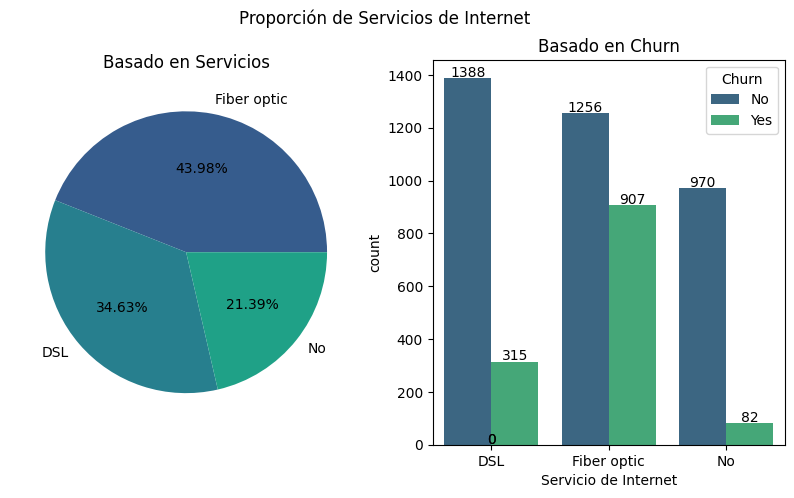

In [172]:
# Crear un subplot con dos columnas para mostrar gráficos de conteo
fig, ax = plt.subplots(
    ncols=2,
    figsize=(10, 5)
)
# Crear un gráfico de conteo para 'InternetService' vs. 'Churn' en el subplot derecho
sns.countplot(
    x=data['InternetService'],
    hue=data['Churn'],
    palette='viridis',
    ax=ax[1]
).set_title('Basado en Churn')
ax[1].set_xlabel('Servicio de Internet')
axes = plt.gca()
# Anotar los valores de conteo sobre las barras en el subplot derecho
for p in axes.patches:
    axes.annotate(
        text=f'{p.get_height():.0f}',
        xy=(
            (p.get_x() + (p.get_width() / 2)),
            (p.get_height() + 5)
        ),
        ha='center'
    )
# Crear un gráfico de pastel para la proporción de servicios de Internet en el subplot izquierdo
ax[0].pie(
    x=data['InternetService'].value_counts(),
    labels=data['InternetService'].value_counts().index,
    autopct='%.2f%%',
    colors=sns.color_palette('viridis')[1:4]
)
ax[0].set_title('Basado en Servicios')
fig.suptitle('Proporción de Servicios de Internet')

La mayoría de los clientes están suscritos a servicios de fibra óptica, seguido por DSL y un pequeño porcentaje no tiene servicio de Internet.
La fibra óptica es el servicio más popular entre los clientes de la compañía.

Observamos que los clientes que tienen servicios de fibra óptica son los que tienen la mayor propensión al abandono, seguidos por DSL y luego los que no tienen servicio de Internet.

La cantidad de clientes que abandonan el servicio es considerablemente mayor entre aquellos que tienen fibra óptica en comparación con los que tienen DSL o no tienen servicio de Internet.

In [173]:
# Aca se obsrva cada servicio del con respecto a la premanecia y los cargos
data[data['Churn']=='Yes'].groupby('InternetService').describe().transpose()


InternetService              DSL  Fiber optic         No
tenure         count  315.000000   907.000000  82.000000
               mean    13.901587    19.160970   8.170732
               std     17.277977    19.185584  13.883826
               min      1.000000     1.000000   1.000000
               25%      1.000000     3.000000   1.000000
               50%      5.000000    12.000000   1.000000
               75%     19.500000    31.000000   8.000000
               max     72.000000    72.000000  61.000000
MonthlyCharges count  315.000000   907.000000  82.000000
               mean    49.679047    87.783249  20.455488
               std     13.427161    11.814795   1.563472
               min     23.450001    67.750000  18.850000
               25%     44.324999    78.375000  19.650000
               50%     49.650002    86.449997  20.075000
               75%     55.799999    97.224998  20.500000
               max     85.949997   118.349998  25.900000

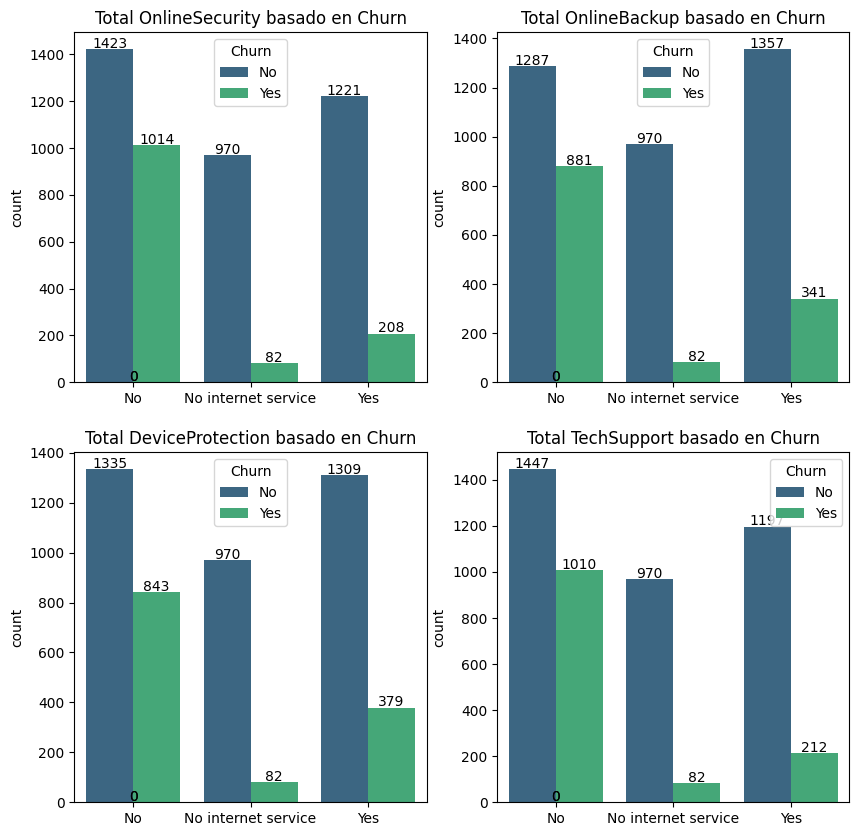

In [174]:
plt.figure(figsize=(10,10))
for i, col in enumerate(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']):
    plt.subplot(2,2,i+1)
    sns.countplot(
        x=data[col],
        hue=data['Churn'],
        palette='viridis'
    )
    plt.title(f'Total {col} basado en Churn'),
    plt.xlabel('')
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(
            text=f'{p.get_height():.0f}',
            xy=(
                (p.get_x()+(p.get_width()/2)),
                (p.get_height()+5)
            ),
            ha='center'
        )

Se observa la distribucón de los clientes de los servicos con el churn

# **Modelos de Aprendizaje Automático**

Se preparan los datos para el prcesamiento
se debe ajustar los datos con las características que no sean numéricas.

In [175]:
items = [
    [
        col,                           # Nombre del atributo
        data[col].dtype,               # Tipo de datos del atributo
        data[col].nunique(),           # Número total de valores únicos
        list(data[col].unique())       # Lista de valores únicos en el atributo
    ]
    for col in data
]
attribute_info_df = pd.DataFrame(
    data=items,
    columns=[
        'Attributes',
        'Data Type',
        'Total Unique',
        'Unique Sample'
    ]
)

La característica Churn, que es categórica y es variable objetivo, se asignará con los criterios para que la clase Sí sea el número 1 y la clase No sea el número 0 utilizando FunctionTransformer().


In [176]:
# Importa las bibliotecas necesarias
!pip install category_encoders
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer, KBinsDiscretizer
from category_encoders import OrdinalEncoder
from imblearn.pipeline import Pipeline
# Define un mapeo personalizado para la columna 'Contract'
mapping = [{
    'col': 'Contract',
    'mapping': {
        'Month-to-month': 0,
        'One year': 1,
        'Two year': 2
    }
}]
# Crea un pipeline de preprocesamiento para características numéricas
num_preprocessor = Pipeline([
    ('binning', KBinsDiscretizer(
        n_bins=20,
        encode='ordinal',
        strategy='quantile'
    )),
    ('scaling', RobustScaler(quantile_range=(0, 100)))
])
# Crea un ColumnTransformer para aplicar diferentes preprocesamientos a diferentes columnas
transformer = ColumnTransformer([
    (
        'multiclass_onehot',
        OneHotEncoder(),
        ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
    ),
    (
        'binary_onehot',
        OneHotEncoder(drop='if_binary'),
        ['Dependents', 'PaperlessBilling']
    ),
    (
        'ordinal',
        OrdinalEncoder(mapping=mapping),
        ['Contract']
    ),
    (
        'map',
        FunctionTransformer(func=lambda x: x == 'Yes'),
        ['Churn']
    ),
    (
        'num_preprocessor',
        num_preprocessor,
        ['tenure', 'MonthlyCharges']
    )
])

Ahora se realizara la separación de entrenmiento y test

In [177]:
from sklearn.model_selection import train_test_split
np.random.seed(1995)
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Churn', axis=1),
    data['Churn'],
    stratify=data['Churn'],
    test_size=0.2,
    random_state=1995
)

Teniendo en cuenta que la característica Churn sigue siendo categórica, es necesario codificarla también a través de ColumnTransformer() para que cada y_train e y_test se combinen con X_train y X_test y se conviertan en data_train y data_test. Se realizara este proceso para para el conjunto de datos de entrenamiento data_train

In [178]:
# Dividir los datos en conjuntos de entrenamiento y prueba con muestreo estratificado
for i, set_ in enumerate([[X_train, y_train], [X_test, y_test]]):
    # Agregar la variable objetivo 'Churn' al conjunto de características
    set_[0]['Churn'] = set_[1]
    if i == 0:
        # Crear el conjunto de datos de entrenamiento con la variable objetivo
        data_train = set_[0].copy()
    else:
        # Crear el conjunto de datos de prueba con la variable objetivo
        data_test = set_[0].copy()
# Codificar las características usando los transformadores especificados
train_encoded_values = transformer.fit_transform(data_train)
test_encoded_values = transformer.transform(data_test)
# Generar nombres de características después de la codificación
feature_names = []
# Extraer nombres de características para variables categóricas codificadas one-hot
for i in range(3):
    feature_names += list(np.array(object=transformer.transformers_[i][1].get_feature_names_out()))
# Agregar nombres de características para variables numéricas no codificadas
feature_names += ['Churn', 'tenure', 'MonthlyCharges']
# Crear dataframes con las características codificadas y los nombres de características
data_train_encoded = pd.DataFrame(
    data=train_encoded_values,
    columns=feature_names
)
data_test_encoded = pd.DataFrame(
    data=test_encoded_values,
    columns=feature_names
)

Se aplica codificación one-hot a características categóricas que tienen valores binarios, como "Sí" y "No", cada valor único se convierte en su propia columna binaria.



In [179]:
# Lista de columnas que se eliminarán de los conjuntos de datos codificados
cols_dropped = [
    'InternetService_No',
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service'
]
# Eliminar las columnas especificadas del conjunto de datos de entrenamiento
data_train_encoded = data_train_encoded.drop(
    columns=cols_dropped,
    axis=1
)
# Eliminar las columnas especificadas del conjunto de datos de prueba
data_test_encoded = data_test_encoded.drop(
    columns=cols_dropped,
    axis=1
)


 Se elimina las columnas que indican la falta de un servicio de Internet o ciertos servicios relacionados con Internet de los conjuntos de datos codificados, lo que puede ser necesario para evitar la redundancia y mejorar la calidad de los datos para el modelado posterior.

Una vez realizado el proceso de selección de características, el conjunto de datos listo se utilizará para construir y validar el modelo de aprendizaje automático

In [180]:
for i, dataset in enumerate([data_train_encoded, data_test_encoded]):
    before = [dataset[j].dtype for j in dataset.columns]
    dataset[list(dataset.columns)[:-2]] = dataset[list(dataset.columns)[:-2]].astype('int8')
    dataset[list(dataset.columns)[-2:]] = dataset[list(dataset.columns)[-2:]].astype('float32')
    items = [[
        col,
        before[k],
        dataset[col].dtype
    ] for k, col in enumerate(dataset)]
    print('\nInformación de atributos codificada {}'.format('Conjunto de datos de formación' if i == 0 else 'Conjunto de datos de formación'))
    display(pd.DataFrame(
        data=items,
        columns=[
            'Features',
            'Before',
            'After'
        ]
    ))
    dataset.info(verbose=False)


Información de atributos codificada Conjunto de datos de formación


,Features,Before,After
0,InternetService_DSL,float64,int8
1,InternetService_Fiber optic,float64,int8
2,OnlineSecurity_No,float64,int8
3,OnlineSecurity_Yes,float64,int8
4,OnlineBackup_No,float64,int8
5,OnlineBackup_Yes,float64,int8
6,DeviceProtection_No,float64,int8
7,DeviceProtection_Yes,float64,int8
8,TechSupport_No,float64,int8
9,TechSupport_Yes,float64,int8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Columns: 16 entries, InternetService_DSL to MonthlyCharges
dtypes: float32(2), int8(14)
memory usage: 84.6 KB

Información de atributos codificada Conjunto de datos de formación


,Features,Before,After
0,InternetService_DSL,float64,int8
1,InternetService_Fiber optic,float64,int8
2,OnlineSecurity_No,float64,int8
3,OnlineSecurity_Yes,float64,int8
4,OnlineBackup_No,float64,int8
5,OnlineBackup_Yes,float64,int8
6,DeviceProtection_No,float64,int8
7,DeviceProtection_Yes,float64,int8
8,TechSupport_No,float64,int8
9,TechSupport_Yes,float64,int8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Columns: 16 entries, InternetService_DSL to MonthlyCharges
dtypes: float32(2), int8(14)
memory usage: 21.3 KB


Se reduce la memoraria, con lo que facilitita el trabajo y asi obtener un mejor resultado en el procesamiento

Para los conjuntos de datos de entrenamiento y prueba en características entrada y la variable objetivo salida, los nombres de las columnas sean de tipo string. Dado lo anterior se realiza el cambio tipo de variable

In [181]:
# Separar el conjunto de datos de entrenamiento en características y objetivo
X_trainval = data_train_encoded.drop(
    columns='Churn',
    axis=1
)
y_trainval = data_train_encoded['Churn']
# Separar el conjunto de datos de prueba en características y objetivo
X_test = data_test_encoded.drop(
    columns='Churn',
    axis=1
)
y_test = data_test_encoded['Churn']
# Convertir los nombres de las columnas a tipo de dato string para ambos conjuntos de datos
for i in [X_trainval, X_test]:
    i.columns = i.columns.astype(str)

Se comprueba el cambio a datos string para relizar el test y el entrenmiento.secuencia de caracteres, es decir, una cadena

In [182]:
# Verificar los tipos de datos en X_trainval
print(X_trainval.dtypes)
# Verificar los tipos de datos en X_test
print(X_test.dtypes)

InternetService_DSL               int8
InternetService_Fiber optic       int8
OnlineSecurity_No                 int8
OnlineSecurity_Yes                int8
OnlineBackup_No                   int8
OnlineBackup_Yes                  int8
DeviceProtection_No               int8
DeviceProtection_Yes              int8
TechSupport_No                    int8
TechSupport_Yes                   int8
Dependents_Yes                    int8
PaperlessBilling_Yes              int8
Contract                          int8
tenure                         float32
MonthlyCharges                 float32
dtype: object
InternetService_DSL               int8
InternetService_Fiber optic       int8
OnlineSecurity_No                 int8
OnlineSecurity_Yes                int8
OnlineBackup_No                   int8
OnlineBackup_Yes                  int8
DeviceProtection_No               int8
DeviceProtection_Yes              int8
TechSupport_No                    int8
TechSupport_Yes                   int8
Dependents_

Variable categoricas que se modifica numéricamente


| **Tipo de Dato** | **Descripción**                                                                                      | **Rango**                           | **Tamaño** |
|------------------|------------------------------------------------------------------------------------------------------|-------------------------------------|------------|
| **float32**      | Tipo de dato de punto flotante de 32 bits. Representa números reales con decimales.                  | Aproximadamente -3.4e38 a 3.4e38    | 4 bytes    |
| **int8**         | Tipo de dato entero de 8 bits. Representa números enteros pequeños. Ideal para variables categóricas. | -128 a 127                          | 1 byte     |


In [183]:
from sklearn.preprocessing import StandardScaler
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_trainval)
X_test = scaler.transform(X_test)

La curva ROC (Receiver Operating Characteristic) es una herramienta comúnmente utilizada para evaluar el rendimiento de un modelo de clasificación binaria en diferentes umbrales de decisión. La curva ROC representa la tasa de verdaderos positivos (TPR, por sus siglas en inglés) en el eje y (sensibilidad) y la tasa de falsos positivos (FPR, por sus siglas en inglés) en el eje x


Curva ROC te proporcionará una visualización del rendimiento del modelo en términos de su capacidad para discriminar entre las clases positiva y negativa. Un AUC-ROC más cercano a 1 indica un mejor rendimiento del modelo.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



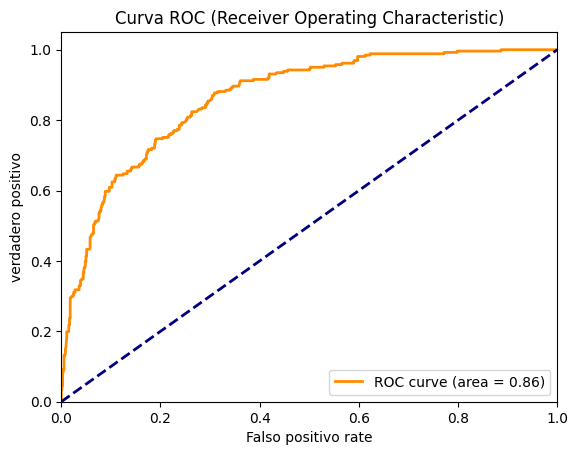

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
# Inicializar y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_trainval, y_trainval)
# Obtener las probabilidades predichas en el conjunto de prueba
y_scores = logistic_model.predict_proba(X_test)[:, 1]
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso positivo rate')
plt.ylabel('verdadero positivo')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()

El modelo AUC-ROC es de 0.87, es un buen indicador que el modelo de clasificación binaria tiene un buen rendimiento y es capaz de hacer predicciones precisas en tus datos de prueba.

# **Reducción de Dimensionalidad con PCA y Regresión Logística**


## **¿Por qué usar estos modelos? **

1.   PCA reduce la dimensionalidad de tus datos al transformar las características originales en un conjunto nuevo de características no correlacionadas llamadas componentes principales.
2.   PCA puede ayudar a eliminar la multicolinealidad entre características altamente correlacionadas
3. Aplicabilidad a problemas de clasificación binaria: Si estás trabajando en un problema donde solo tienes dos clases (por ejemplo, "Sí" o "No", "1" o "0"),
4. la regresión logística es una opción sólida para problemas de clasificación binaria debido a su interpretación sencilla, eficiencia computacional, capacidad de regularización y flexibilidad en la configuración de umbrales de decisión.


PCA + Regresión Logística Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       723
           1       0.69      0.57      0.62       261

    accuracy                           0.82       984
   macro avg       0.77      0.74      0.75       984
weighted avg       0.81      0.82      0.81       984



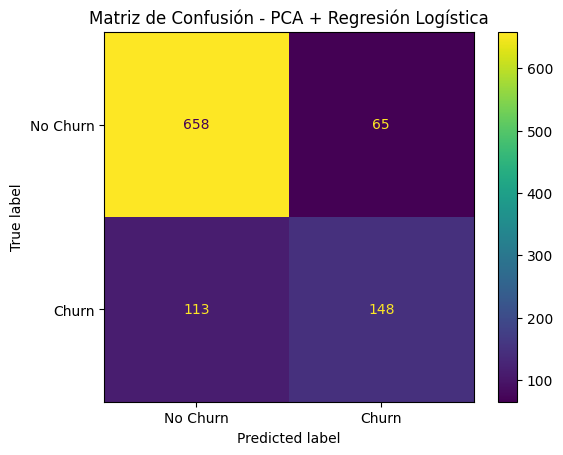

In [184]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=10)  # Podemos ajustar el número de componentes
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Entrenar el modelo de Regresión Logística con los datos transformados por PCA
logistic_pca = LogisticRegression(max_iter=1000, random_state=42)
logistic_pca.fit(X_train_pca, y_trainval)
# Realizar predicciones
y_pred_pca = logistic_pca.predict(X_test_pca)
# Evaluar el modelo
print("PCA + Regresión Logística Informe de clasificación:")
print(classification_report(y_test, y_pred_pca))
# Generar y graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='viridis')
plt.title('Matriz de Confusión - PCA + Regresión Logística')
plt.show()


# Conclusión :


1. La exactitud general del modelo es del 82%, lo que significa que el 82% de todas las predicciones realizadas por el modelo son correctas.
2.    El 85% de las predicciones de "No churn" son correctas y el 69% de las predicciones de "Churn" son correctas.
3. El 91% de los clientes que realmente no abandonaron el servicio fueron identificados correctamente, mientras que solo el 57% de los clientes que realmente abandonaron el servicio fueron identificados correctamente.


Es un buen modelo para detectar la catidada de clientes que pretender salir de la compañia.



# **Random Forest / Bosaque aleatorio**
Usamos un segundo modelo para poder determinar con mayor precisón el análisis de los clientes que quieren salir de la compañia.

1. usamos porque Random Forest puede manejar este desequilibrio de clase de manera efectiva y generalmente ofrece un buen rendimiento incluso con clases desbalanceadas.
2. Random Forest puede manejar de manera eficiente tanto las características categóricas como las numéricas

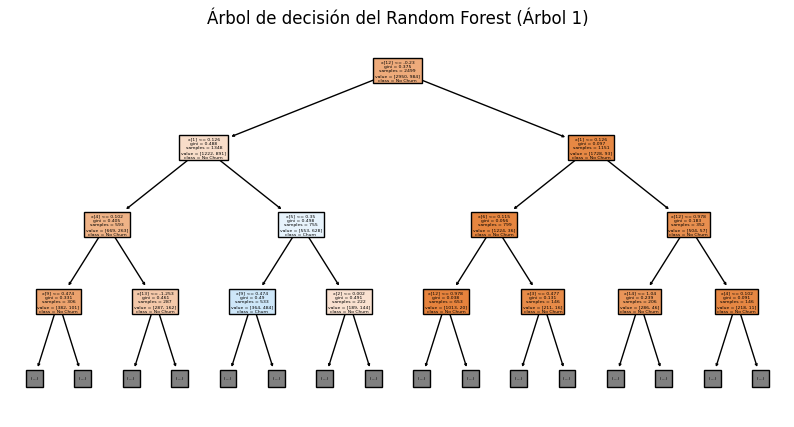

In [192]:
# Seleccionar un árbol del modelo Random Forest
tree_index = 0  # Puedes seleccionar cualquier árbol del bosque
estimator = rf_model.estimators_[tree_index]
# Graficar el árbol seleccionado con un tamaño más pequeño
plt.figure(figsize=(10, 5))
plot_tree(estimator, filled=True, class_names=['No Churn', 'Churn'], max_depth=3)
plt.title(f"Árbol de decisión del Random Forest (Árbol {tree_index + 1})")
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       723
           1       0.63      0.49      0.55       261

    accuracy                           0.79       984
   macro avg       0.73      0.69      0.71       984
weighted avg       0.78      0.79      0.78       984



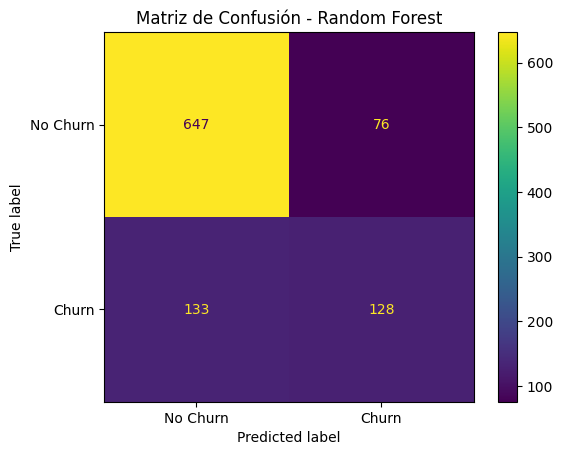

In [185]:
from sklearn.ensemble import RandomForestClassifier
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_trainval)
# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)
# Evaluar el modelo
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
# Generar y graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='viridis')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Conclusión :


1. La exactitud indica la proporción de predicciones correctas (tanto positivas como negativas) sobre el total de predicciones realizadas por el modelo. En este caso, la exactitud general del modelo es del 79%.
2. Para la clase "No Churn" (0), la precisión es del 83%, lo que significa que el 83% de las predicciones de "No Churn" son correctas. Para la clase "Churn" (1), la precisión es del 63%, lo que significa que el 63% de las predicciones de "Churn"
3. Es mejor el modelo de regresión logistica ya que tiene mayor precisón.


# 5. Análisis Prescriptivo
Caracteristicas Relevantes para determianr la predicción de abandono temprano de clientes.

In [131]:
# Entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_trainval, y_trainval)
# Obtener los coeficientes de las características
feature_importance = logistic_model.coef_[0]
# Crear un DataFrame para mostrar las características y sus coeficientes
feature_importance_df = pd.DataFrame({
    'Feature': X_trainval.columns,
    'Coefficient': feature_importance
})
# Ordenar el DataFrame por el valor absoluto del coeficiente
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)
# Mostrar las características más importantes
print("Top 5 características importantes para predecir el abandono de clientes:")
print(feature_importance_df.head())

Top 5 características importantes para predecir el abandono de clientes:
                 Feature  Coefficient  Abs_Coefficient
13                tenure    -2.722723         2.722723
14        MonthlyCharges     1.606790         1.606790
12              Contract    -0.778582         0.778582
11  PaperlessBilling_Yes     0.366750         0.366750
2      OnlineSecurity_No     0.323252         0.323252


Estos resultados muestran las cinco características más importantes para predecir el abandono de clientes, junto con los coeficientes asociados a cada característica. Aquí está la interpretación:

Tenure (Antigüedad)

La antigüedad del cliente en la compañía es la característica más importante para predecir el abandono. Un coeficiente negativo indica que a medida que la antigüedad aumenta, es menos probable que el cliente abandone la compañía.

MonthlyCharges (Cargos Mensuales):

Los cargos mensuales que un cliente paga son la segunda característica más importante. Un coeficiente positivo indica que a medida que aumentan los cargos mensuales, es más probable que el cliente abandone la compañía


Contract (Tipo de Contrato):

El tipo de contrato que tiene el cliente también es un factor importante. Un coeficiente negativo sugiere que ciertos tipos de contrato están asociados con una menor probabilidad de abandono en comparación con otros tipos de contrato.


PaperlessBilling_Yes (Facturación Electrónica):

Si el cliente utiliza la facturación electrónica, es más probable que abandone la compañía. Un coeficiente positivo indica una asociación positiva entre la facturación electrónica y el abandono del cliente.


OnlineSecurity_No (Sin Seguridad en Línea):

La falta de seguridad en línea es otro factor que contribuye al abandono del cliente. Un coeficiente positivo sugiere que la falta de seguridad en línea está asociada con una mayor probabilidad de abandono.

Estos coeficientes son una forma de medir la contribución de cada característica al modelo de regresión logística.

**Recomendaciones Para la comapñia**

Recomendaciones para Mejorar la Retención de Clientes
Aumentar la Antigüedad de los Clientes (Tenure)

Programas de Fidelización: Implementar programas de fidelización que recompensen a los clientes por su lealtad y permanencia con la compañía.

Planes Flexibles: Introducir planes de precios más flexibles que se adapten mejor a las necesidades y presupuesto de diferentes segmentos de clientes.

Contratos a Largo Plazo con Beneficios: Promover contratos a largo plazo ofreciendo beneficios adicionales, como tarifas reducidas o servicios adicionales gratuitos.

Ofrecer Servicios de Seguridad en Línea: Incluir servicios de seguridad en línea como parte de los paquetes de servicios, o como un servicio adicional a un costo reducido.

# Recomendaciones para mejorar al modelo



1.   Se necesitan nuevas características relevantes para poder desarrollar un modelo de algoritmo eficaz.
2.   Los resultados de las predicciones existentes pueden desarrollarse para realizar una segmentación de clientes con base en similitudes en determinadas características, se pude profundizar y aumentar el accuaracy a un 90% para arriba.



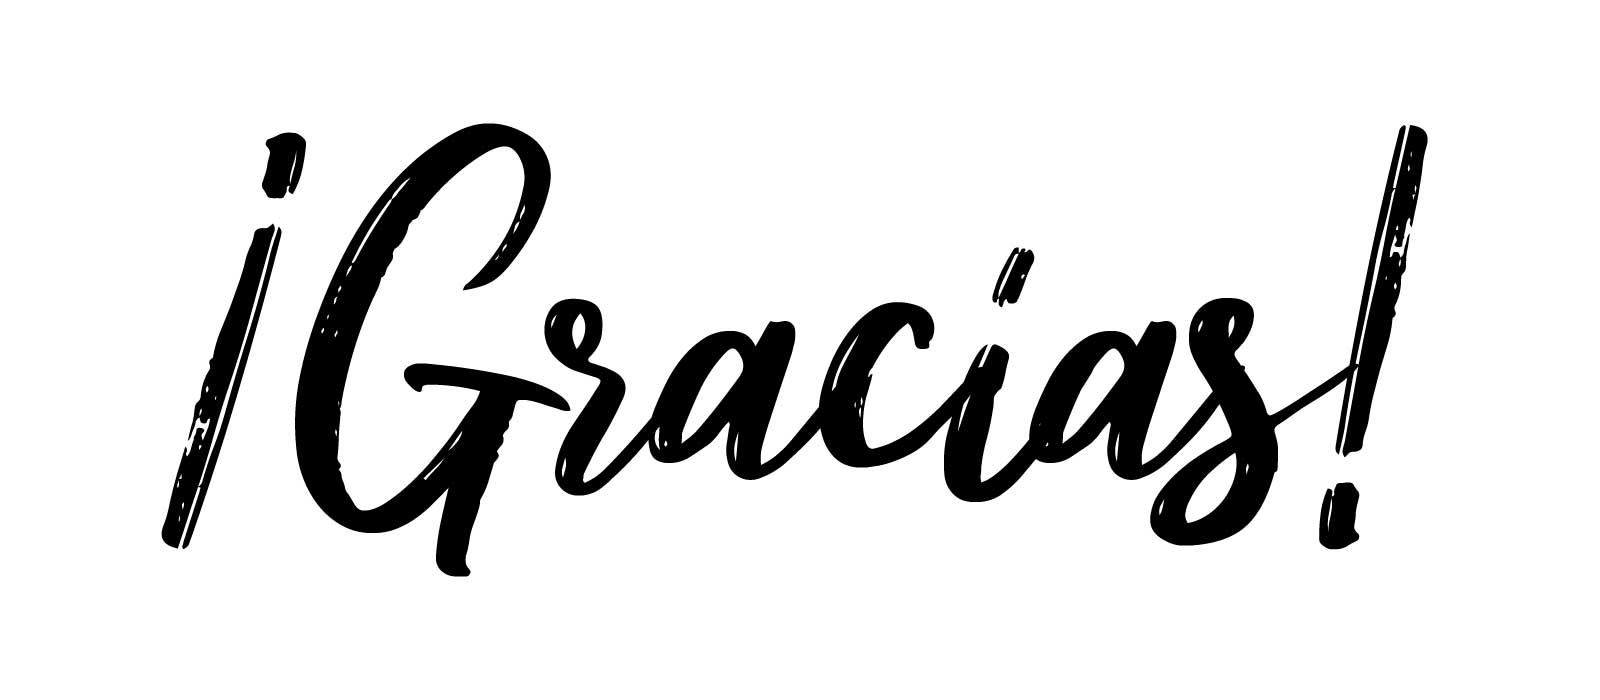